In [1]:
from functions.crop_image import random_crop
from functions.load_training_data import training_samples
from skimage import io
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Load training samples

In [2]:
training_images, training_labels = training_samples(1000, [1,1,1,1])

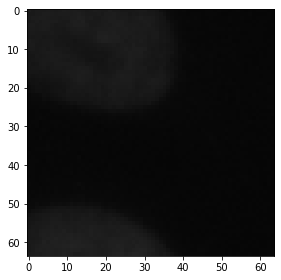

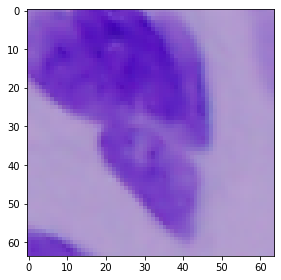

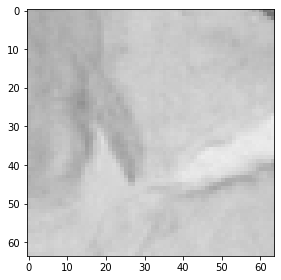

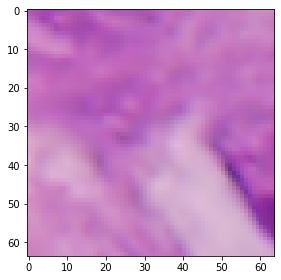

<Figure size 432x288 with 0 Axes>

In [3]:
count = 0
for i in training_images:
    io.imshow(i)
    plt.figure()

    if count == 3: 
        break
    
    count += 1

# Configure GPU for training

In [4]:
from functions.tf_config import config_gpu

config_gpu(5, True)

8 Physical GPUs, 1 Logical GPU
Configured to run on GPU 5


# Create model
* be sure that final dense layer reflects the number of categories we're training for

In [5]:
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, input_shape=(64, 64, 3), activation='relu', strides=(2,2)),
    keras.layers.Conv2D(16, 3, activation='relu', strides=(2,2)),
    keras.layers.Conv2D(8, 3, activation='relu', strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(4)
])

In [6]:
predictions = model(training_images).numpy()
predictions

array([[ 4.1372105e-03, -7.5097126e-04,  9.9549070e-06, -1.1752422e-02],
       [-2.2590693e-02, -3.9179247e-02, -2.4271384e-03, -1.6295709e-02],
       [-4.4549216e-02, -6.7482337e-02, -5.1793780e-02, -1.1183614e-01],
       ...,
       [-4.3343633e-02, -2.9336927e-02, -7.1936376e-02, -6.1602190e-02],
       [-2.9885696e-02, -2.9012822e-02, -4.3498985e-02, -4.3675207e-02],
       [-2.1706071e-02, -2.8430259e-02, -3.1554457e-02, -4.3342166e-02]],
      dtype=float32)

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.25155708, 0.25033042, 0.25052097, 0.24759153],
       [0.24936217, 0.24525973, 0.25444123, 0.25093684],
       [0.25607958, 0.2502737 , 0.2542311 , 0.23941568],
       ...,
       [0.25202727, 0.25558218, 0.24492316, 0.24746738],
       [0.25165734, 0.2518771 , 0.24825466, 0.2482109 ],
       [0.25239176, 0.25070032, 0.2499183 , 0.24698964]], dtype=float32)

In [8]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(training_labels, predictions).numpy()

1.3880353

In [9]:
opt = keras.optimizers.Adam(learning_rate=.0001)
model.compile(optimizer=opt,
             loss=loss_fn,
             metrics=['accuracy'])

In [10]:
model.fit(training_images, training_labels, epochs=5, validation_split=.01)

Epoch 1/5
124/124 [==============================] - 1s 10ms/step - loss: 0.9802 - accuracy: 0.6189 - val_loss: 0.4852 - val_accuracy: 0.8750
Epoch 2/5
124/124 [==============================] - 1s 6ms/step - loss: 0.2625 - accuracy: 0.9449 - val_loss: 0.2413 - val_accuracy: 0.9000
Epoch 3/5
124/124 [==============================] - 1s 6ms/step - loss: 0.1270 - accuracy: 0.9583 - val_loss: 0.1536 - val_accuracy: 0.9250
Epoch 4/5
124/124 [==============================] - 1s 6ms/step - loss: 0.0959 - accuracy: 0.9649 - val_loss: 0.1881 - val_accuracy: 0.9500
Epoch 5/5
124/124 [==============================] - 1s 8ms/step - loss: 0.0880 - accuracy: 0.9657 - val_loss: 0.1986 - val_accuracy: 0.9500


In [11]:
# use model.predict to test model
# use the trained model on a random image crop
# create an example of how to use the model once it's trained
# do the same in the regression model (with the predicted avg. size instead of color)

In [12]:
from functions.plot_predictions import plot_image, plot_value_array

In [13]:
probability_model = keras.Sequential([model, 
                                     keras.layers.Softmax()])
predictions = probability_model.predict(training_images)

In [14]:
predictions[0]

array([9.9892622e-01, 7.8177312e-04, 1.6201743e-04, 1.2998865e-04],
      dtype=float32)

In [15]:
test_images, test_labels = training_samples(1, [1,1,1,1])

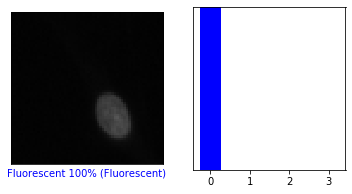

In [16]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

<Figure size 864x432 with 0 Axes>

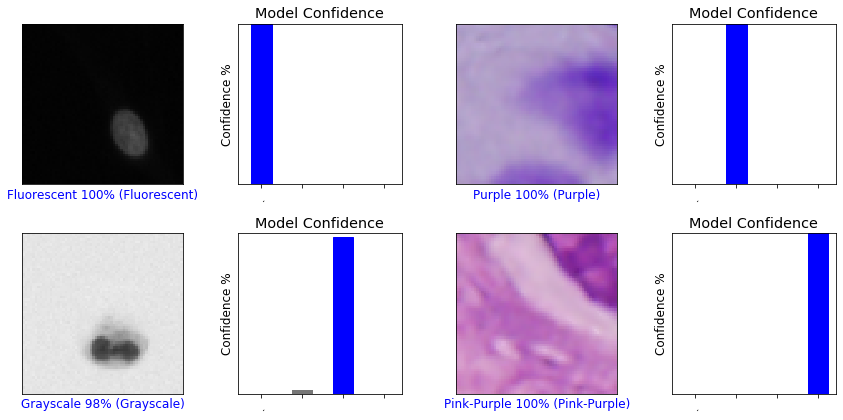

In [17]:
num_rows = 2
num_cols = 2
num_images = num_rows * num_cols

plt.figure(figsize=(2*3*num_cols, 3*num_rows))
plt.rcParams.update({'font.size': 12})
class_names = [".", ".", ".", "."]

plt.subplots(num_rows, num_cols, figsize=(12,6))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plt.bar(x=class_names,
           height="Confidence")
    plt.title("Model Confidence")
    plt.ylabel("Confidence %")
    plt.xticks(rotation=45)
    plot_value_array(i, predictions[i], test_labels)
    
plt.tight_layout()
plt.show()
